In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
from sklearn import svm
from sklearn.datasets import make_blobs

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl
from scipy import stats
from scipy.stats import multivariate_normal
from scipy import linalg
import seaborn as sns

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# #############################################################################
# Colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)



# use seaborn plotting defaults
import seaborn as sns; sns.set()

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

np.random.seed(42)

In [2]:
# Génère les données pour deux nuages de points 2D
def dataset(n,mu,C):
    dim = 2
    if len(n) == 2:
        # Deux nuages de points
        X0 = np.random.multivariate_normal(mu[0], C[0], n[0])        
        X = np.random.multivariate_normal(mu[1], C[1], n[1])
        X = np.r_[X0, X]
        y = np.hstack((np.zeros(n[0]), np.ones(n[1])))
    else:
        # Trois nuages de points
        X0 = np.random.multivariate_normal(mu[0], C[0], n[0])
        X1 = np.random.multivariate_normal(mu[1], C[1], n[1])
        X = np.random.multivariate_normal(mu[2], C[2], n[2])
        X = np.r_[X0, X1, X]
        y = np.hstack((np.zeros(n[0]), np.ones(n[1]), np.ones(n[2])*2))
        
    return X, y


In [3]:
# Génération des données au moyen d'une somme de deux distributions gaussiennes anisotropes

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# Cas avec 2 nuages de points: paramètres des gaussiennes
mu2 = np.zeros((2,2))
mu2[0,:] = [-1., -1.]
mu2[1,:] = [1., 0.]

cov2 = np.zeros((2,2,2))
cov2[0,:,:] = [[.5, 0.], [0., .75]]
cov2[1,:,:] = [[1.5, -.5], [-.5, 1.]]

# Génération du dataset
r0, r1 = 0.6, 0.4
n_pts = 300
n_pts = 100
n0 = int(r0*n_pts)
n1 = int(r1*n_pts)
npts2 = np.array([n0, n1])

dataset2 = dataset(npts2,mu2,cov2)

# Cas avec 3 nuages de points: paramètres des gaussiennes
mu3 = np.zeros((3,2))
mu3[0,:] = [0., 0.]
mu3[1,:] = [0., 5.]
mu3[2,:] = [5., 5.]

cov3 = np.zeros((3,2,2))
cov3[0,:,:] = [[1., 0.], [0., 1.]]
cov3[1,:,:] = [[1., 0.], [0., 1.]]
cov3[2,:,:] = [[1., 0.], [0., 1.]]

# Génération du dataset
r0, r1, r2 = 0.4, 0.3, 0.3
n_pts = 300
n0 = int(r0*n_pts)
n1 = int(r1*n_pts)
n2 = int(r2*n_pts)
npts3 = np.array([n0, n1, n2])

dataset3 = dataset(npts3,mu3,cov3)

In [43]:
# Colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.5, 0.5)],
     'green': [(0, 0.5, 0.5), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
#     {'red': [(0, 1, 1), (1, 0.7, 0.7)],
#      'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
#      'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)


plt.cm.register_cmap(cmap=cmap)

def plot_data2(lda, X, y, y_pred, ax):

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # class 0: dots
    ax.scatter(X0_tp[:, 0], X0_tp[:, 1], marker='.', color='red')
    ax.scatter(X0_fp[:, 0], X0_fp[:, 1], marker='x',
                s=20, color='#990000')  # dark red

    # class 1: dots
    ax.scatter(X1_tp[:, 0], X1_tp[:, 1], marker='.', color='blue')
    ax.scatter(X1_fp[:, 0], X1_fp[:, 1], marker='x',
                s=20, color='#000099')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                  norm=colors.Normalize(0., 1.), zorder=0)
    ax.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

    
    
    
    
def plot_data3(lda, X, y, y_pred, ax):

    tp = (y == y_pred)  # True Positive
    tp0, tp1, tp2 = tp[y == 0], tp[y == 1], tp[y == 2]
    X0, X1, X2 = X[y == 0], X[y == 1], X[y == 2]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]
    X2_tp, X2_fp = X2[tp2], X2[~tp2]

    # class 0: dots
    ax.scatter(X0_tp[:, 0], X0_tp[:, 1], marker='.', color='red')
    ax.scatter(X0_fp[:, 0], X0_fp[:, 1], marker='x',
                s=20, color='#990000')  # dark red

    # class 1: dots
    ax.scatter(X1_tp[:, 0], X1_tp[:, 1], marker='.', color='blue')
    ax.scatter(X1_fp[:, 0], X1_fp[:, 1], marker='x',
                s=20, color='#000099')  # dark blue

    # class 2: dots
    ax.scatter(X2_tp[:, 0], X2_tp[:, 1], marker='.', color='green')
    ax.scatter(X2_fp[:, 0], X2_fp[:, 1], marker='x',
                s=20, color='#009900')  # dark green

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
#    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])

    Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)

    ax.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                  norm=colors.Normalize(0., 2.), zorder=0)
    ax.contour(xx, yy, Z, [0, 1, 2], linewidths=2., colors='white')    
  

C:\Users\pgsci\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'style'
  # Remove the CWD from sys.path while we load stuff.
C:\Users\pgsci\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'style'
  # This is added back by InteractiveShellApp.init_path()
C:\Users\pgsci\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The following kwargs were not used by contour: 'style'
  
C:\Users\pgsci\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'style'
  from ipykernel import kernelapp as app
C:\Users\pgsci\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'style'
C:\Users\pgsci\anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: The following kwargs were not used by contour: 'style'


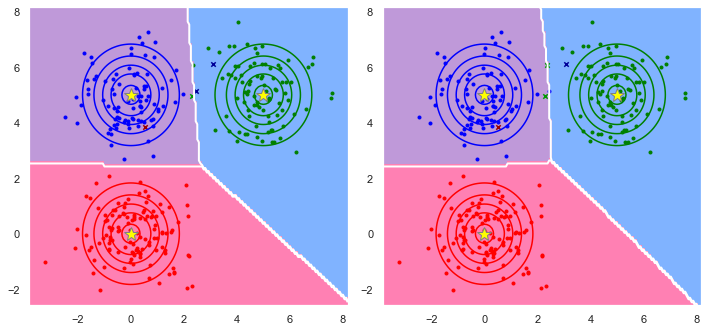

In [44]:
# Linear Discriminant Analysis
fig, ax = plt.subplots(1,2,figsize=(10,5), facecolor='white')

x_min, x_max, y_min, y_max = -2., 7., -2., 7.
nx, ny = 100, 100
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
pos = np.dstack((xx, yy))

rv = multivariate_normal(mu3[0,:],cov3[0,:,:])
ax[0].contour(xx, yy, rv.pdf(pos),levels=5,style="--",colors='red')
ax[1].contour(xx, yy, rv.pdf(pos),levels=5,style="--",colors='red')

rv = multivariate_normal(mu3[1,:],cov3[1,:,:])
ax[0].contour(xx, yy, rv.pdf(pos),levels=5,style="--",colors='blue')
ax[1].contour(xx, yy, rv.pdf(pos),levels=5,style="--",colors='blue')

rv = multivariate_normal(mu3[2,:],cov3[2,:,:])
ax[0].contour(xx, yy, rv.pdf(pos),levels=5,style="--",colors='green')
ax[1].contour(xx, yy, rv.pdf(pos),levels=5,style="--",colors='green')

ax[0].plot(mu3[0][0],mu3[0][1],'*', color='yellow', markersize=15, markeredgecolor='grey')
ax[0].plot(mu3[1][0],mu3[1][1],'*', color='yellow', markersize=15, markeredgecolor='grey')
ax[0].plot(mu3[2][0],mu3[2][1],'*', color='yellow', markersize=15, markeredgecolor='grey')
ax[1].plot(mu3[0][0],mu3[0][1],'*', color='yellow', markersize=15, markeredgecolor='grey')
ax[1].plot(mu3[1][0],mu3[1][1],'*', color='yellow', markersize=15, markeredgecolor='grey')
ax[1].plot(mu3[2][0],mu3[2][1],'*', color='yellow', markersize=15, markeredgecolor='grey')

(X, y) = dataset3
    
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(X, y).predict(X)
plot_data3(lda, X, y, y_pred, ax[0])
ax[0].set_xlim(x_min, x_max)
ax[0].set_ylim(y_min, y_max)
ax[0].axis('tight')

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_pred = qda.fit(X, y).predict(X)
plot_data3(qda, X, y, y_pred, ax[1])
ax[1].set_xlim(x_min, x_max)
ax[1].set_ylim(y_min, y_max)
ax[1].axis('tight')

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()